In [232]:
import numpy as np

$(1 + \text{geometric return})^n = \prod_{i=1}^n{1+r_i}$

$\text{geometric return} = \sqrt[n]{\prod_{i=1}^n{1+r_i}} - 1$

In [233]:
def geometricReturn(rs):
    l = 1
    for r in rs:
        l *= 1 + r
    
    return l**(1/len(rs)) - 1

In [234]:
rs = np.array([3, 7, 5, 12, 1])/100
geometricReturn(rs)

0.055334022907651992

In [235]:
rs = np.array([4, 6, 5, 6, 6.7])/100
geometricReturn(rs)

0.055357881080939197

## House / Mortgage pricing


## derivation

if $m_i$ is the amount due at the end of the $i$th month, every month the amount due is increased by the interest such that:

* $m_0 = p$
* $m_1 = (1+r)m_0 - c$
* $m_2 = (1+r)m_1 - c = (1+r)^2p - c[1 + (1+r)]$
* $m_3 = (1+r)m_2 - c = (1+r)^3p - c[1 + (1+r) + (1+r^2)]$

from the above it is easy to infer that

$m_n = (1+r)^np - c\sum_{i=0}^{n-1}(1+r)^i \stackrel{\text{Geometric Series}}{=} (1+r)^np - c\frac{(1+r)^n-1}{r}$



In [430]:
def dueAtN(p, c, r, n):
    return p*(1+r)**n  - c*((1+r)**n -1)/r

### Setting the equality

at month $n=N$ the loan must be paid off and hence $m_N = 0$ leading to

$(1+r)^Np = c\frac{(1+r)^N-1}{r}$

from which we get

$\frac{c}{p} = \frac{r(1+r)^N}{(1+r)^N-1} = \frac{r}{1-(1+r)^{-N}}$

note that when $r = 0$, 

$\frac{p}{c}= \lim_{r \to 0} \frac{1-(1+r)^{-N}}{r} = \frac{\lim_{r \to 0}1-(1+r)^{-N}}{\lim_{r \to 0}r}\stackrel{\text{L'Hôpital}}{=} \frac{\lim_{r \to 0}N(1+r)^{-N-1}}{\lim_{r \to 0}1} = N $



In [431]:
def mortgageMultiplier(r, n):
    d = 1 - (1+r)**(-n)
    return r/d

"""
 ref: https://en.wikipedia.org/wiki/Mortgage_calculator#Monthly_payment_formula
"""
def mortgageRepayment(p, r, n):
    return p * mortgageMultiplier(r, n)

In [432]:
# test of the above
p = 100000
r = 3.92/100/12
N = 25*12
m1 = mortgageRepayment(p, r, N)
print(np.round(m1) == 523)
print(np.round(m1*N) == 157029)

# test here
p = 1000000
r = 1/100/12
N = 20*12
m2 = mortgageRepayment(1000000, 1./100/12, 20*12)
print(np.round(m2) == 4599)
print(np.round(m2*N) == 1103746)


True
True
True
True


### Total cost of the mortgage

$\text{total cost} = cN$

### Total interest paid

the total amount of interest paid will hence be

$I = cN - p$

### Interest paid at time $n$

note the symbol $\delta$ used for interest (force of interest: https://en.wikipedia.org/wiki/Compound_interest#Force_of_interest)

$\delta_n = rm_n = (pr -c)(1+r)^n + c = pr(1+r)^n - c((1+r)^n-1) $

In [433]:
def interestAtN(p, c, r, n):
    return dueAtN(p, c, r, n)*r

### Cumulative interest paid until $n$

$\sum_{k=0}^{n-1} \delta_k = \sum_{k=0}^{n-1} \left(pr(1+r)^k - c((1+r)^k-1)\right) = \sum_{k=0}^{n-1} \left((pr-c)
(1+r)^k +c\right)= \sum_{k=0}^{n-1} (pr-c)(1+r)^k +\sum_{k=0}^{n-1}c$

In [434]:
"""
cumulative interests

"""
def interestAtN(p, c, r, n):
    return (p*r - c)*((1+r)**n-1)/r + c*n

we can find $I$ again by setting $n=N$

$I = \sum_{k=0}^{N-1} \delta_k =(pr-c)\frac{(1+r)^N - 1}{r} + cN= ... = -p + cN$

#### derivation for the $p$ below

$-p = (pr -c)\frac{(1+r)^N-1}{r}$

$ -p = \left(pr -\frac{pr}{1-(1+r)^{-N}}\right)\frac{(1+r)^N-1}{r}$

$ -p = p\left(1 -\frac{1}{1-(1+r)^{-N}}\right)\left((1+r)^N-1\right)$

$ -p = p\underbrace{\frac{-(1+r)^{-N}}{1-(1+r)^{-N}}\frac{1-(1+r)^{-N}}{(1+r)^{-N}}}_{-1}=-p$

In [435]:
# defining principal
pricehouse = 1000
downpaymentP = .2
fixCostP = .1
fixCost = pricehouse * fixCostP
totalCost = pricehouse*(1+fixCostP)
downpayment = totalCost*downpaymentP
principal = totalCost - downpayment
print('principal of {}'.format(principal))

principal of 880.0


In [436]:
# interest
rYearly = .0339
r = rYearly / 12

print('yearly interest of {}% and monthly of {}%'.format(np.round(100*rYearly, 2), np.round(100*r, 2)))

yearly interest of 3.39% and monthly of 0.28%


In [437]:
# loan duration
NYear = 30
N = int(NYear * 12)

print('N={} years and 12N={} months'.format(NYear, N))

N=30 years and 12N=360 months


In [438]:
# income
rent = 15

In [439]:
# cost
cost = rent * .15

In [440]:
profitMonth = rent - cost
profit = profitMonth * 12
returnYearly = profit/downpayment
returnYearly

0.6954545454545454

In [441]:
import pandas as pd

In [442]:
# mortgage repayment
monthlyRepayment = mortgageRepayment(principal, r, N)
monthlyRepayment

3.8977570981111955

In [443]:
mortgage = np.ones(N)*monthlyRepayment

interestRentShare = r*dueAtN(principal, monthlyRepayment, r, np.arange(N) )
equityRentShare = mortgage - interestRentShare

d = {'mortgage': mortgage, }
df = pd.DataFrame(data=d)

df.insert(1,'interest rent share', interestRentShare, True)
df.insert(2,'equity rent share', equityRentShare, True)
df.insert(3,'still due', dueAtN(principal, monthlyRepayment, r, np.arange(N) ), True)

totalInterest = monthlyRepayment * N - principal

print('total interest: {} or {}'.format(np.round(np.sum(interestRentShare)), np.round(monthlyRepayment * N - principal)))
print('total equity: {} or {}'.format(np.round(np.sum(equityRentShare)), principal))

df

total interest: 523.0 or 523.0
total equity: 880.0 or 880.0


,mortgage,interest rent share,equity rent share,still due
0,3.897757,2.486000,1.411757,880.000000
1,3.897757,2.482012,1.415745,878.588243
2,3.897757,2.478012,1.419745,877.172498
3,3.897757,2.474002,1.423756,875.752753
4,3.897757,2.469979,1.427778,874.328997
5,3.897757,2.465946,1.431811,872.901220
6,3.897757,2.461901,1.435856,871.469408
7,3.897757,2.457845,1.439912,870.033552
8,3.897757,2.453777,1.443980,868.593640
9,3.897757,2.449698,1.448059,867.149660


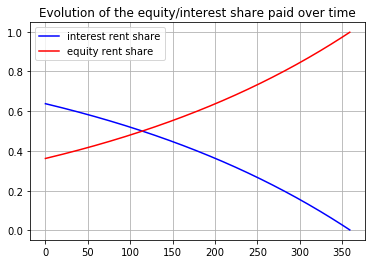

In [473]:
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, mpld3

# gca stands for 'get current axis'
ax = plt.gca()

plt.plot(df['interest rent share']/mortgage, 'blue', label='interest rent share')
plt.plot(df['equity rent share']/mortgage, 'red', label='equity rent share')

#line, = ax.plot([1, 2, 3], label='Inline label')
ax.legend()
plt.title('Evolution of the equity/interest share paid over time')

plt.grid()
plt.show()
#mpld3.display()
#mpld3.show()

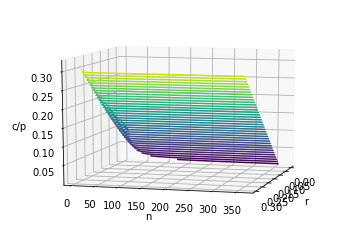

In [470]:
import matplotlib.animation as animation

# visualizing c/p surface
rs = np.linspace(0.00001, .3)
ns = np.linspace(10, 30*12)
X, Y = np.meshgrid(rs, ns)

pc = mortgageMultiplier(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, pc, 50)
ax.set_xlabel('r')
ax.set_ylabel('n')
ax.set_zlabel('c/p');

# changes the angle
ax.view_init(10, 15)

plt.show()
#mpld3.show()
#mpld3.display()
